In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator

sns.set()

In [167]:
a = np.array( [x for x in range(10,13)])
print(a)
b = np.array([ [1,2], [3,4],[5,6] ])
b1 = np.hstack([np.ones((3,1)), b])

print(b1)

print(b.T*a)

print(b1@a)
print(a@b1.T)

[10 11 12]
[[ 1.  1.  2.]
 [ 1.  3.  4.]
 [ 1.  5.  6.]]
[[10 33 60]
 [20 44 72]]
[  45.   91.  137.]
[  45.   91.  137.]


[[  0.09799661]
 [  0.88320853]
 [  0.93820052]
 [  1.56441289]
 [  1.70812288]
 [  2.7112491 ]
 [  3.63602301]
 [  3.22160387]
 [  3.91835908]
 [  4.98565171]
 [  5.29757045]
 [  5.30450672]
 [  7.04496822]
 [  7.16187785]
 [  7.51919609]
 [  8.4113977 ]
 [  8.10080633]
 [  7.98545753]
 [ 10.03998709]
 [  9.86683604]]
[-0.9706182   0.85738986  1.18850699  0.69915631  2.41657441  1.97442718
  2.75984937  3.16822193  5.58348895  5.78089758  5.39997677  6.31123806
  6.60710538  6.94889734  7.77355182  7.31649367  8.22988152  9.68690889
  9.57022222  9.63130875]


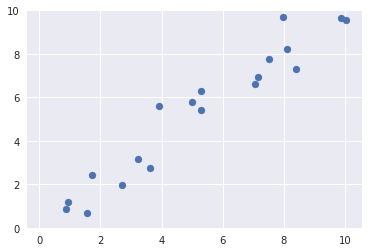

In [168]:
np.random.seed(26)
m = 20
line = np.linspace(0, 10, m)
points = np.random.randn(m, 2) * 0.5 + line.reshape(-1, 1)
X = points[:, 0].reshape(-1, 1)
print(X)
y = points[:, 1]
print(y)
plt.scatter(points[:, 0], points[:, 1])
plt.ylim(0, 10);
plt.show()

In [217]:
class MyLinearRegression(BaseEstimator):
    def __init__(self, alpha=0.01, iters=10000):
        self.alpha = alpha
        self.iters = iters
    def fit(self,X,y):
        # X is matrix
        # y is row
        (m, n) = X.shape
        
        # we append xo = 1 to X
        X = np.hstack([np.ones( (m,1) ),X])
        
        # random coef
        theta = np.random.rand(n + 1)
        print((X @ theta ).shape)
        print((theta @ X.T).shape)
        for _it in range(0, self.iters):
            theta -= self.alpha * ( ( (X @ theta - y) * X.T ) .sum(1) / m )
        self.theta = theta
        self.coef_ = theta[1:]
        self.intercept_ = theta[0]
        return self
        
        
    def predict(self,X):
        (m,n) = X.shape
        X = np.hstack([np.ones((m,1)),X])
        return X @ self.theta

In [218]:
from sklearn.linear_model import LinearRegression

sk = LinearRegression().fit(X,y)
print(sk.coef_)
print(sk.intercept_)

my = MyLinearRegression().fit(X,y)
print(my.coef_)
print(my.intercept_)

print(sk.predict(5))
print(my.predict(np.array([ [5] ] )))



[ 1.02134823]
-0.0803630253747
(20,)
[ 1.02134823]
-0.0803630253722
[ 5.02637811]
[ 5.02637811]
